In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing # Import label encoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [5]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Crop Prediction Using SVM/cpdata.csv")
data.shape

(3100, 5)

## **Data Preprocessing**

### **Metadata :**

**Temperature** - Temperature in degree Celsius

**humidity** - Relative humidity in %

**ph** - ph value of the soil

**rainfall** - Rainfall in mm 

*Here a model is trained from these historical recommendations, in order to provide an autonomous crop selection based on the above variables*

In [6]:
data.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
print("No of classes: ", len(data['label'].unique()))

No of classes:  31


In [8]:
data['label'].value_counts()

Peas            100
Black gram      100
Jute            100
Chickpea        100
Sugarcane       100
wheat           100
Cotton          100
rice            100
Lentil          100
Tea             100
Moth Beans      100
Rubber          100
Tobacco         100
maize           100
banana          100
Mung Bean       100
apple           100
Coffee          100
watermelon      100
Pigeon Peas     100
Ground Nut      100
mango           100
Adzuki Beans    100
Kidney Beans    100
pomegranate     100
muskmelon       100
Coconut         100
grapes          100
millet          100
orange          100
papaya          100
Name: label, dtype: int64

In [9]:
##check missing values
data.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
Label = data['label']
Label

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In [12]:
label_encoder = preprocessing.LabelEncoder()
data['label']= label_encoder.fit_transform(data['label'])

In [13]:
mapped = dict(zip(data['label'],Label))

In [16]:
data.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int64
dtype: object

In [17]:
features_df=data[{'temperature', 'humidity', 'ph', 'rainfall'}]
label_df=data['label']

#independant variable
X=np.asarray(features_df)

#dependant variable
y=np.asarray(label_df)

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(features_df,label_df)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [19]:
print(model.feature_importances_)

[0.15295589 0.34443555 0.2640834  0.23852515]


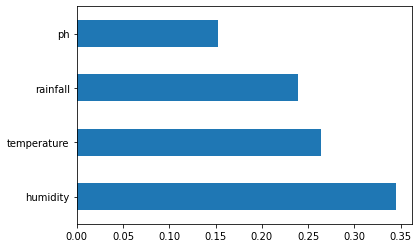

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features_df.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [21]:
data.describe()

,temperature,humidity,ph,rainfall,label
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031,15.000000
std,7.566308,24.007713,0.809477,64.048562,8.945715
min,8.825675,10.034048,3.504752,20.211267,0.000000
25%,22.810495,55.244920,5.895343,64.909095,7.000000
50%,26.102848,68.980529,6.342518,97.057093,15.000000
75%,29.365644,84.446524,6.841616,141.210784,23.000000
max,54.986760,99.981876,9.935091,397.315380,30.000000


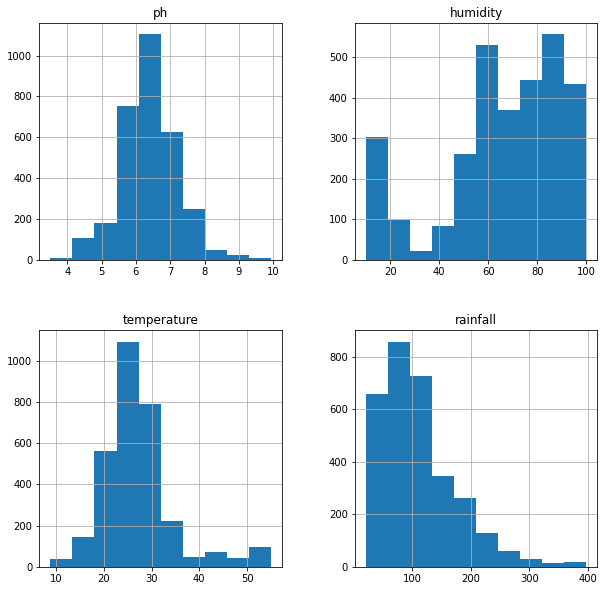

In [22]:
features_df.hist(figsize = (10, 10))
plt.show()

In [23]:
#data(100)-->train(80 rows)/test(20 rows)
#train(x,y) X(2D) and Y(1D)
#test(X,Y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
#(2480, 4)
print("X_train.shape:",X_train.shape)
#(2480,1)
print("y_train.shape:",y_train.shape)
#(620, 4)
print("X_test.shape:",X_test.shape)
#(620, 1)
print("y_test.shape:",y_test.shape)

X_train.shape: (2480, 4)
y_train.shape: (2480,)
X_test.shape: (620, 4)
y_test.shape: (620,)


### **Training**

In [24]:
#Create a svm Classifier 
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
#Train the model using the training sets
classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_predict=classifier.predict(X_test)

In [25]:
#Confusion Matrix
confusion_matrix(y_test, y_predict)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  

In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.92      0.90        24
           2       1.00      1.00      1.00        21
           3       0.95      0.95      0.95        21
           4       0.73      0.95      0.83        20
           5       0.86      0.90      0.88        20
           6       0.85      0.92      0.88        24
           7       0.59      0.76      0.67        17
           8       1.00      1.00      1.00        17
           9       0.96      0.92      0.94        25
          10       0.75      0.86      0.80        14
          11       0.89      0.89      0.89        19
          12       1.00      1.00      1.00        19
          13       0.86      0.55      0.67        22
          14       0.96      0.96      0.96        23
          15       0.73      0.73      0.73        15
          16       0.90      0.90      0.90        20
          17       0.86    

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8596774193548387


In [28]:
lst = [27.74080015,	56.38574223	,6.02697455	,111.3764672]
arr = np.array(lst)
arr = arr.reshape(1,-1)
val = (int)(classifier.predict(arr))
print(mapped[val])

Coffee


In [29]:
import pickle
pickle.dump(classifier,open('/content/drive/MyDrive/Colab Notebooks/Crop Prediction Using SVM/SVM_model.pkl','wb'))
model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Crop Prediction Using SVM/SVM_model.pkl','rb'))